In [66]:
from simple_data_analysis.config import RAW_DATA_DIR
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VERSION = '1'
dir = RAW_DATA_DIR / VERSION
invoice = pd.read_csv(dir / "Invoice.csv")

# 8.2
<h3 style="direction: ltr;">میانگین فروش در کشور های مختلف با فاصله اطمینان 95 درصدی</h3>

### # Check BillingCountry column for nan value

In [11]:
invoice[invoice['BillingCountry'].isna()]

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total


### # Check Total column

In [20]:
invoice['Total'].describe()

count    412.000000
mean       5.651942
std        4.745320
min        0.990000
25%        1.980000
50%        3.960000
75%        8.910000
max       25.860000
Name: Total, dtype: float64

### # Describe BillingCountry column

In [22]:
invoice['BillingCountry'].describe()

count     412
unique     24
top       USA
freq       91
Name: BillingCountry, dtype: object

### Top 10 Country base on count of invoice

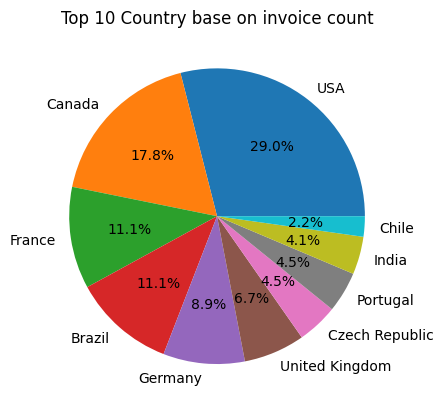

In [73]:
countries = invoice.groupby(by="BillingCountry")['BillingCountry'].count()
countries = countries.sort_values(ascending=False)

keys = countries.index[:10]
values = countries.values[:10]

plt.title("Top 10 Country base on invoice count")
plt.pie(values, labels=keys, autopct="%.1f%%")
plt.show()

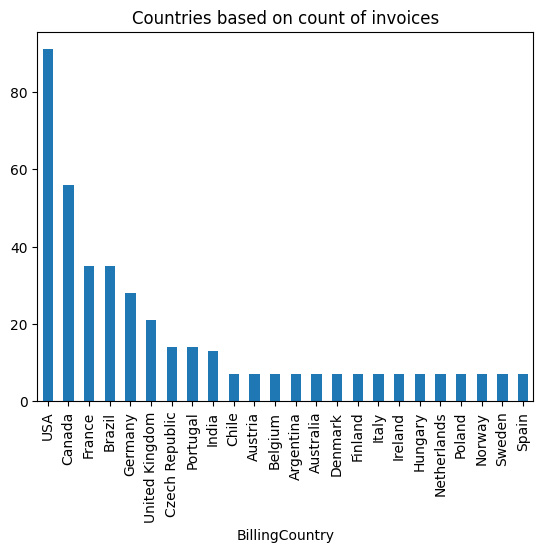

In [86]:
# show countries as barplot
countries.plot.bar()
plt.title("Countries based on count of invoices")
plt.show()

### Average of sales per country

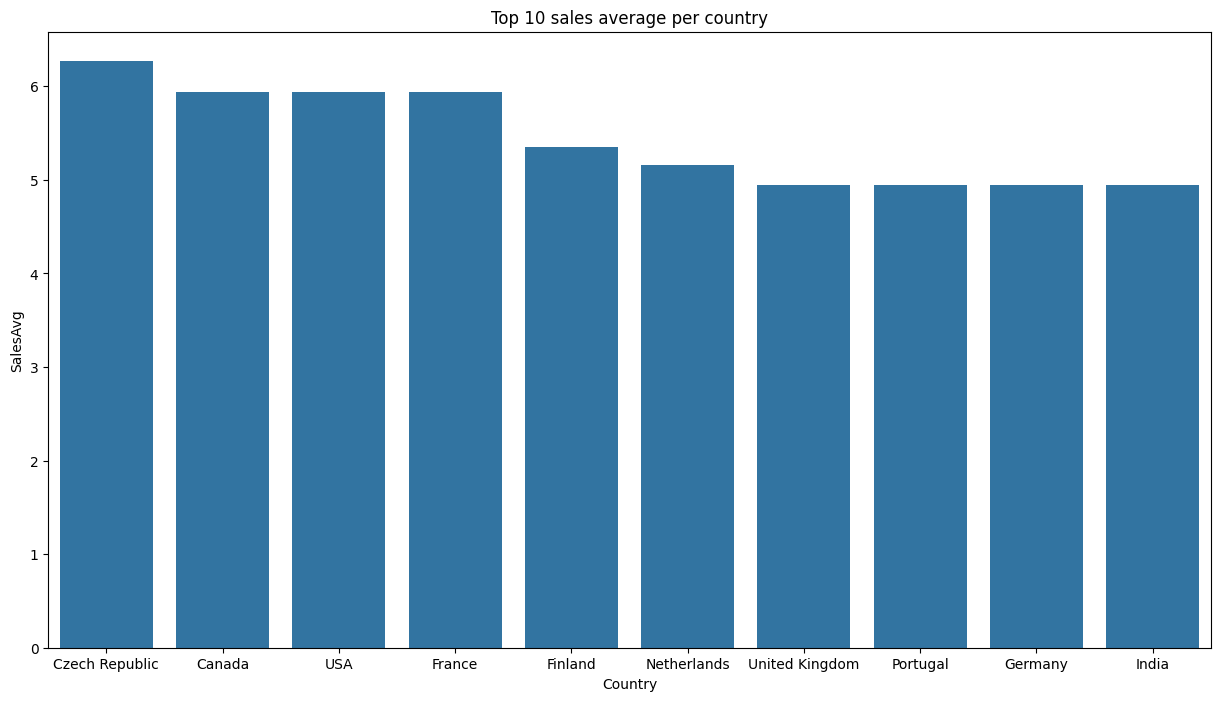

In [178]:
df = invoice.groupby(by='BillingCountry')

result = {
    "Country": [],
    "SalesAvg": [],
    "Interval_I": [],
    "Interval_J": []
}

for BillingCountry, data in df:
    
    if len(data['Total']) - 1 == 0:
        continue

    i, j = st.t.interval(0.95, len(data['Total']) - 1, loc=np.mean(data['Total']), scale=st.sem(data['Total']))
    result['Country'].append(BillingCountry)
    result['SalesAvg'].append(data[(data['Total'] >= i) & (data['Total'] <= j)]['Total'].mean())
    result['Interval_I'].append(i)
    result['Interval_J'].append(j)


df = pd.DataFrame(result)
df = df.sort_values(by="SalesAvg", ascending=False)
plt.figure(figsize=(15,8))
plt.title("Top 10 sales average per country")
sns.barplot(data=df[:10], x='Country', y='SalesAvg')
plt.show()

### Count of customer per country

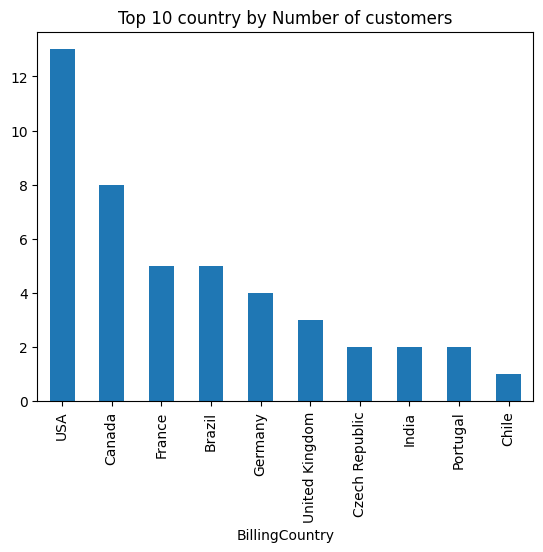

In [177]:
customers = invoice.groupby(by=['BillingCountry'])['CustomerId'].nunique()
customers = customers.sort_values(ascending=False)
customers[:10].plot.bar()
plt.title("Top 10 countries by number of customers")
plt.show()